### Making imports 

In [4]:
import networkx as nx
import numpy as np
import pandas as pd
import operator
import json
from collections import defaultdict
import matplotlib.pyplot as plt

### Uploading and Preprocessing Data

In [5]:
explore_data = pd.read_json("cleaned_events.json")

In [6]:
explore_data.shape

(22503, 77)

In [7]:
#explore_data.head()

In [8]:
with open('cleaned_events.json') as json_file:
    graph_data = json.load(json_file)

In [9]:
type(graph_data)

list

In [10]:
print(len(graph_data))
print(graph_data[:2])

22503
[['4594575', '9649581', '3313879', '6138079', '6524595', '6670222'], ['4594575', '6455997', '9582575', '6138079', '9649581']]


### Creating Unique Nodes

In [11]:
uniq_nodes = {x for l in graph_data for x in l}

In [12]:
print(len(uniq_nodes))
print(type(uniq_nodes))

746
<class 'set'>


In [28]:
#checking with an alternative code
res=()
for item in graph_data:
    res = list(set(res) | set(item))
print(len(res))

746


In [29]:
#converting set into a list
uniq_nodes_2 = list(uniq_nodes)

In [15]:
print(len(uniq_nodes_2))
print(type(uniq_nodes_2))

746
<class 'list'>


In [16]:
uniq_nodes_2[:10]

['9893168',
 '6796337',
 '2388443',
 '1673992',
 '1151261',
 '6375956',
 '4397146',
 '7597459',
 '7114194',
 '3386962']

In [17]:
graph_data2 = [['4594575', '9649581', '3313879', '6138079', '6524595', '6670222'], ['4594575', '6455997', '9582575', '6138079', '9649581']]

In [18]:
len(graph_data2)

2

In [25]:
#creating edges on a smaller data set
edge = [[i[0],j] for i in graph_data2 for j in i[1:]]
edge

[['4594575', '9649581'],
 ['4594575', '3313879'],
 ['4594575', '6138079'],
 ['4594575', '6524595'],
 ['4594575', '6670222'],
 ['4594575', '6455997'],
 ['4594575', '9582575'],
 ['4594575', '6138079'],
 ['4594575', '9649581']]

In [30]:
#creating edges from a list of meetings 
graph_data3 = graph_data2[0]
graph_data3

['4594575', '9649581', '3313879', '6138079', '6524595', '6670222']

In [31]:
edges_graph_data3 = [(graph_data3[i],graph_data3[j]) for i in range(len(graph_data3)) for j in range(i+1, len(graph_data3))]

In [32]:
print(edges_graph_data3)
print(type(edges_graph_data3))
print(len(edges_graph_data3))

[('4594575', '9649581'), ('4594575', '3313879'), ('4594575', '6138079'), ('4594575', '6524595'), ('4594575', '6670222'), ('9649581', '3313879'), ('9649581', '6138079'), ('9649581', '6524595'), ('9649581', '6670222'), ('3313879', '6138079'), ('3313879', '6524595'), ('3313879', '6670222'), ('6138079', '6524595'), ('6138079', '6670222'), ('6524595', '6670222')]
<class 'list'>
15


In [47]:
#rechecking the code above 
edges = []
for i in range(len(graph_data3)):
    for j in range(i+1, len(graph_data3)):
        edges.append((graph_data3[i],graph_data3[j])) 

In [48]:
print(edges)
print(type(edges))
print(len(edges))

[('4594575', '9649581'), ('4594575', '3313879'), ('4594575', '6138079'), ('4594575', '6524595'), ('4594575', '6670222'), ('9649581', '3313879'), ('9649581', '6138079'), ('9649581', '6524595'), ('9649581', '6670222'), ('3313879', '6138079'), ('3313879', '6524595'), ('3313879', '6670222'), ('6138079', '6524595'), ('6138079', '6670222'), ('6524595', '6670222')]
<class 'list'>
15


In [64]:
edges_graph_data2 = []
edges_graph_final = []
for item in graph_data2:
    for i in range(len(item)):
        for j in range(i+1, len(item)):
            edges_graph_data2.append((item[i],item[j]))
    edges_graph_final.append(edges_graph_data2)
    edges_graph_data2 = []
print(len(edges_graph_final[1]))
print(edges_graph_final)

10
[[('4594575', '9649581'), ('4594575', '3313879'), ('4594575', '6138079'), ('4594575', '6524595'), ('4594575', '6670222'), ('9649581', '3313879'), ('9649581', '6138079'), ('9649581', '6524595'), ('9649581', '6670222'), ('3313879', '6138079'), ('3313879', '6524595'), ('3313879', '6670222'), ('6138079', '6524595'), ('6138079', '6670222'), ('6524595', '6670222')], [('4594575', '6455997'), ('4594575', '9582575'), ('4594575', '6138079'), ('4594575', '9649581'), ('6455997', '9582575'), ('6455997', '6138079'), ('6455997', '9649581'), ('9582575', '6138079'), ('9582575', '9649581'), ('6138079', '9649581')]]


In [ ]:
for lst in graph_data[:6750]:
    for i in range(len(lst)):
        for j in range(i+1, len(lst)):
            edges_nested.append((lst[i],lst[j])) 

### Creating Edges from an Actual Data

In [34]:
#trying on 30% from an actual set
edges_nested = []
for lst in graph_data[:6750]:
    for i in range(len(lst)):
        for j in range(i+1, len(lst)):
            edges_nested.append((lst[i],lst[j])) 

In [36]:
print(edges_nested[:10])
print(type(edges_nested))
print(len(edges_nested))

[('4594575', '9649581'), ('4594575', '3313879'), ('4594575', '6138079'), ('4594575', '6524595'), ('4594575', '6670222'), ('9649581', '3313879'), ('9649581', '6138079'), ('9649581', '6524595'), ('9649581', '6670222'), ('3313879', '6138079')]
<class 'list'>
142338


In [37]:
#trying on 50% from an actual set
edges_nested_half = []
for lst in graph_data[:11252]:
    for i in range(len(lst)):
        for j in range(i+1, len(lst)):
            edges_nested_half.append((lst[i],lst[j])) 

In [38]:
print(edges_nested_half[:10])
print(type(edges_nested_half))
print(len(edges_nested_half))

[('4594575', '9649581'), ('4594575', '3313879'), ('4594575', '6138079'), ('4594575', '6524595'), ('4594575', '6670222'), ('9649581', '3313879'), ('9649581', '6138079'), ('9649581', '6524595'), ('9649581', '6670222'), ('3313879', '6138079')]
<class 'list'>
174642


In [72]:
#full dataset
graph_edges_nested = []
for lst in graph_data:
    for i in range(len(lst)):
        for j in range(i+1, len(lst)):
            graph_edges_nested.append((lst[i],lst[j])) 

In [73]:
print(graph_edges_nested[:10])
print(type(graph_edges_nested))
print(len(graph_edges_nested))

[('4594575', '9649581'), ('4594575', '3313879'), ('4594575', '6138079'), ('4594575', '6524595'), ('4594575', '6670222'), ('9649581', '3313879'), ('9649581', '6138079'), ('9649581', '6524595'), ('9649581', '6670222'), ('3313879', '6138079')]
<class 'list'>
221270


### Creating Edges per List (meeting)

In [70]:
graph_edges_full = []
graph_edges_partial = []
for item in graph_data:
    for i in range(len(item)):
        for j in range(i+1, len(item)):
            graph_edges_partial.append((item[i],item[j]))
    graph_edges_full.append(graph_edges_partial)
    graph_edges_partial = []
print(len(graph_edges_full))
#print(graph_edges_full)

22503


In [71]:
graph_edges_full[:3]

[[('4594575', '9649581'),
  ('4594575', '3313879'),
  ('4594575', '6138079'),
  ('4594575', '6524595'),
  ('4594575', '6670222'),
  ('9649581', '3313879'),
  ('9649581', '6138079'),
  ('9649581', '6524595'),
  ('9649581', '6670222'),
  ('3313879', '6138079'),
  ('3313879', '6524595'),
  ('3313879', '6670222'),
  ('6138079', '6524595'),
  ('6138079', '6670222'),
  ('6524595', '6670222')],
 [('4594575', '6455997'),
  ('4594575', '9582575'),
  ('4594575', '6138079'),
  ('4594575', '9649581'),
  ('6455997', '9582575'),
  ('6455997', '6138079'),
  ('6455997', '9649581'),
  ('9582575', '6138079'),
  ('9582575', '9649581'),
  ('6138079', '9649581')],
 [('4594575', '6138079'), ('4594575', '9649581'), ('6138079', '9649581')]]

### Counting Edge Weights 

For each meeting
  get all pairs of participants
  if pair is in G.edges:
    increase edge weight by 1
  else
    add edge to graph

In [80]:
G = nx.Graph()

In [88]:
for lst in graph_edges_full:
    for e1, e2 in lst:
        if G.has_edge(e1,e2) :
            G[e1][e2]['weight'] += 1
        else :
            G.add_edge(e1,e2,weight=1)

In [91]:
G.size()

19951

In [93]:
G.edges(data=True)

EdgeDataView([('4594575', '9649581', {'weight': 72}), ('4594575', '3313879', {'weight': 14}), ('4594575', '6138079', {'weight': 28}), ('4594575', '6524595', {'weight': 30}), ('4594575', '6670222', {'weight': 29}), ('4594575', '6455997', {'weight': 9}), ('4594575', '9582575', {'weight': 10}), ('4594575', '4550719', {'weight': 20}), ('4594575', '1441624', {'weight': 24}), ('4594575', '6608661', {'weight': 19}), ('4594575', '6159135', {'weight': 24}), ('4594575', '7690572', {'weight': 7}), ('4594575', '9087840', {'weight': 3}), ('4594575', '3803338', {'weight': 23}), ('4594575', '9972486', {'weight': 22}), ('4594575', '7067231', {'weight': 1}), ('4594575', '1003825', {'weight': 3}), ('4594575', '6493517', {'weight': 3}), ('4594575', '8503467', {'weight': 24}), ('4594575', '1865518', {'weight': 21}), ('4594575', '5858806', {'weight': 24}), ('4594575', '8546110', {'weight': 23}), ('4594575', '2399690', {'weight': 24}), ('4594575', '8139386', {'weight': 23}), ('4594575', '5163413', {'weight'

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


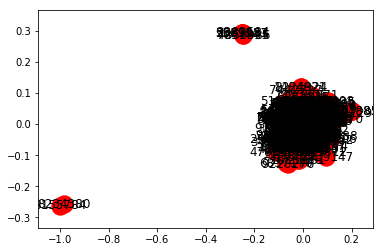

In [92]:
start_pos = nx.spring_layout(G, seed = 100)
nx.draw_networkx(G, pos=start_pos)

### Removing Two Small Groups from a Graph

In [98]:
graphs = list(nx.connected_component_subgraphs(G))

In [100]:
graphs

In [107]:
for i, sg in enumerate(graphs):
    print('subgraph {} has {} nodes'.format(i, sg.number_of_nodes()))
    #print('\tNodes:', sg.nodes(data=True))
    #print('\tEdges:', sg.edges())

subgraph 0 has 738 nodes
subgraph 1 has 6 nodes
subgraph 2 has 2 nodes


In [117]:
G_sub=list(nx.connected_component_subgraphs(G))[0]

In [171]:
G_sub

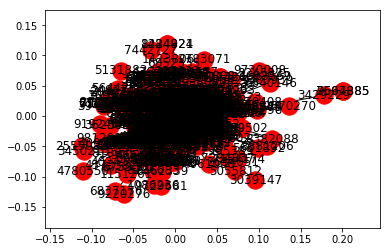

In [120]:
nx.draw_networkx(G_sub, pos=start_pos)

### Community Detection

In [122]:
pip install python-louvain

    100% |████████████████████████████████| 204kB 3.0MB/s ta 0:00:01
  Stored in directory: /Users/naidamuslimova/Library/Caches/pip/wheels/cb/a8/eb/20aa8acb5ad4c23a72b7d4159adc75202243a4106a738981b7
Successfully built python-louvain
Note: you may need to restart the kernel to use updated packages.


In [124]:
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

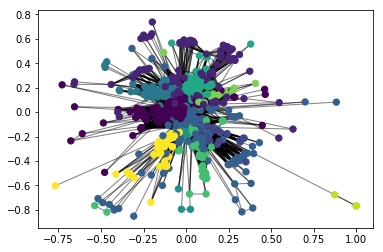

In [128]:
# load the karate club graph
#G = nx.karate_club_graph()

#first compute the best partition
partition = community_louvain.best_partition(G_sub)

# compute the best partition
#partition = community_louvain.best_partition(G_sub)

# draw the graph
pos = nx.spring_layout(G_sub)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G_sub, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G_sub, pos, alpha=0.5)
plt.show()


In [174]:
partition

{'4594575': 0,
 '9649581': 0,
 '3313879': 0,
 '6138079': 0,
 '6524595': 0,
 '6670222': 0,
 '6455997': 0,
 '9582575': 0,
 '4550719': 0,
 '1441624': 0,
 '6608661': 0,
 '6159135': 0,
 '7690572': 0,
 '9087840': 0,
 '3803338': 0,
 '9972486': 0,
 '7067231': 0,
 '1003825': 0,
 '6493517': 0,
 '8503467': 0,
 '1865518': 0,
 '5858806': 0,
 '8546110': 0,
 '2399690': 0,
 '8139386': 0,
 '5163413': 0,
 '1112599': 0,
 '5577398': 0,
 '1146339': 0,
 '7423418': 0,
 '3202604': 1,
 '3866212': 2,
 '3267643': 0,
 '4253784': 0,
 '6218893': 0,
 '2998859': 3,
 '2032624': 0,
 '1673698': 4,
 '9404446': 0,
 '1106391': 3,
 '5847548': 4,
 '9959855': 3,
 '4320578': 0,
 '7871043': 5,
 '8317303': 0,
 '3069838': 3,
 '6020177': 6,
 '3216939': 3,
 '3577122': 0,
 '5387658': 0,
 '4589257': 0,
 '9050924': 0,
 '2551809': 0,
 '3932931': 0,
 '7793788': 0,
 '3667194': 3,
 '5125270': 1,
 '2726935': 0,
 '8442295': 0,
 '7903662': 7,
 '1481164': 7,
 '6281912': 0,
 '8348725': 0,
 '2301132': 0,
 '9078686': 3,
 '9457825': 6,
 '5247021'

### Network Centrality. Identifying "Community Cores" and "Bridges"

In [149]:
#Degree Centrality. This is based on the assumption that important nodes have many connections.
deg_centrality = nx.degree_centrality(G_sub)
print(deg_centrality)

{'4594575': 0.1587516960651289, '9649581': 0.12075983717774762, '3313879': 0.010854816824966078, '6138079': 0.059701492537313425, '6524595': 0.020352781546811395, '6670222': 0.018995929443690635, '6455997': 0.07191316146540026, '9582575': 0.13297150610583444, '4550719': 0.11940298507462685, '1441624': 0.11668928086838534, '6608661': 0.11940298507462685, '6159135': 0.23066485753052915, '7690572': 0.14654002713704206, '9087840': 0.12211668928086837, '3803338': 0.12890094979647218, '9972486': 0.12890094979647218, '7067231': 0.07055630936227951, '1003825': 0.12890094979647218, '6493517': 0.13297150610583444, '8503467': 0.11397557666214382, '1865518': 0.1655359565807327, '5858806': 0.11668928086838534, '8546110': 0.10990502035278153, '2399690': 0.12890094979647218, '8139386': 0.10990502035278153, '5163413': 0.03934871099050203, '1112599': 0.11668928086838534, '5577398': 0.11397557666214382, '1146339': 0.12347354138398914, '7423418': 0.11397557666214382, '3202604': 0.05020352781546811, '3866

In [167]:
deg_centrality_sort = sorted(deg_centrality.items(), key=lambda x:x[1], reverse=True)

In [168]:
deg_centrality_sort[:10]

[('1442662', 0.4789687924016282),
 ('9208595', 0.4219810040705563),
 ('9909304', 0.39077340569877883),
 ('8480716', 0.3541383989145183),
 ('1165624', 0.31478968792401624),
 ('5316813', 0.28765264586160105),
 ('6355372', 0.28493894165535955),
 ('9959855', 0.2727272727272727),
 ('1682770', 0.24423337856173674),
 ('5766515', 0.24016282225237448)]

In [151]:
#Closeness Centrality : This is based on the assumption that important nodes are close to other nodes.
close_centrality = nx.closeness_centrality(G_sub)
print(close_centrality)

{'4594575': 0.5, '9649581': 0.4776409591704472, '3313879': 0.3451990632318501, '6138079': 0.44829683698296835, '6524595': 0.3501187648456057, '6670222': 0.3499525166191833, '6455997': 0.4274941995359629, '9582575': 0.48423127463863336, '4550719': 0.4776409591704472, '1441624': 0.4745653573728268, '6608661': 0.47919375812743825, '6159135': 0.5298346513299784, '7690572': 0.49663072776280326, '9087840': 0.48013029315960915, '3803338': 0.4936369725385131, '9972486': 0.48327868852459016, '7067231': 0.44966442953020136, '1003825': 0.48423127463863336, '6493517': 0.48905109489051096, '8503467': 0.47425997425997424, '1865518': 0.4936369725385131, '5858806': 0.4745653573728268, '8546110': 0.4724358974358974, '2399690': 0.4798177083333333, '8139386': 0.4724358974358974, '5163413': 0.3779487179487179, '1112599': 0.4745653573728268, '5577398': 0.4736503856041131, '1146339': 0.4785714285714286, '7423418': 0.4736503856041131, '3202604': 0.4355791962174941, '3866212': 0.5253029223093372, '3267643': 0

In [166]:
close_centrality_sort = sorted(close_centrality.items(), key=lambda x:x[1], reverse=True)
close_centrality_sort[:10]

[('1442662', 0.6464912280701754),
 ('9208595', 0.6219409282700422),
 ('9909304', 0.6075845012366035),
 ('8480716', 0.591018444266239),
 ('1165624', 0.5766823161189358),
 ('5316813', 0.5660522273425499),
 ('6355372', 0.5660522273425499),
 ('2446753', 0.5479553903345725),
 ('3203462', 0.5395314787701317),
 ('9959855', 0.5391367959034382)]

In [152]:
#Betweenness Centrality: It assumes that important nodes connect other nodes.
bet_centrality = nx.betweenness_centrality(G_sub, normalized = True, 
                                              endpoints = False)
print(bet_centrality)

{'4594575': 0.004126751925457062, '9649581': 0.0016674039903506867, '3313879': 0.0, '6138079': 0.000832180828395297, '6524595': 1.8951827141203775e-05, '6670222': 1.5947924683829054e-05, '6455997': 0.002672567430733187, '9582575': 0.002325539334202359, '4550719': 0.0005820802801097377, '1441624': 0.00129111520276552, '6608661': 0.0008892669571426078, '6159135': 0.013835227771744792, '7690572': 0.0036113536952805227, '9087840': 0.0008917810928677603, '3803338': 0.002089974352522594, '9972486': 0.0012830775410125463, '7067231': 0.0004743166528790723, '1003825': 0.002260450565759271, '6493517': 0.005939584361196965, '8503467': 0.0005441809204193607, '1865518': 0.004487429127536392, '5858806': 0.00129111520276552, '8546110': 0.00021809890527413293, '2399690': 0.0015595320756976153, '8139386': 0.00021809890527413293, '5163413': 4.525907517410776e-06, '1112599': 0.0005992201556313817, '5577398': 0.0004908811047945548, '1146339': 0.0012650114754578256, '7423418': 0.0004908811047945548, '32026

In [163]:
bet_centrality_sort = sorted(bet_centrality.items(), key=lambda x:x[1], reverse=True)
bet_centrality_sort[:10]

[('9208595', 0.09583329453420684),
 ('1442662', 0.0675156981132638),
 ('8183412', 0.03372926067425677),
 ('6355372', 0.032902476696140805),
 ('8480716', 0.03277587141448449),
 ('9909304', 0.03211652460695476),
 ('8072660', 0.029491965199991102),
 ('1165624', 0.027497099980471288),
 ('9959855', 0.02743594528702309),
 ('5137910', 0.025915199613469924)]

In [147]:
degrees = sorted(G_sub.degree, key=lambda x: x[1], reverse=True)

In [148]:
degrees

[('1442662', 353),
 ('9208595', 311),
 ('9909304', 288),
 ('8480716', 261),
 ('1165624', 232),
 ('5316813', 212),
 ('6355372', 210),
 ('9959855', 201),
 ('1682770', 180),
 ('5766515', 177),
 ('3866212', 173),
 ('8473298', 171),
 ('8314913', 171),
 ('6159135', 170),
 ('2446753', 168),
 ('2388443', 162),
 ('4045740', 157),
 ('1772098', 155),
 ('3203462', 154),
 ('8360528', 154),
 ('6548577', 152),
 ('8788229', 152),
 ('5115594', 149),
 ('1539700', 149),
 ('3344258', 149),
 ('6060622', 148),
 ('9977818', 146),
 ('6676235', 145),
 ('3787271', 143),
 ('5612616', 143),
 ('8072660', 141),
 ('5137910', 140),
 ('9417214', 139),
 ('4937216', 139),
 ('5947540', 139),
 ('6561192', 137),
 ('4194156', 137),
 ('1106391', 136),
 ('2322857', 136),
 ('7903662', 135),
 ('5443940', 135),
 ('1481164', 134),
 ('4263776', 134),
 ('4305026', 133),
 ('6772048', 133),
 ('5147462', 131),
 ('7567736', 131),
 ('3304037', 130),
 ('1482658', 130),
 ('8962643', 129),
 ('8183412', 129),
 ('9876210', 128),
 ('9751098',

(-1.0818184980803596,
 0.6668768891745673,
 -0.6490196516533229,
 0.6691014101524684)

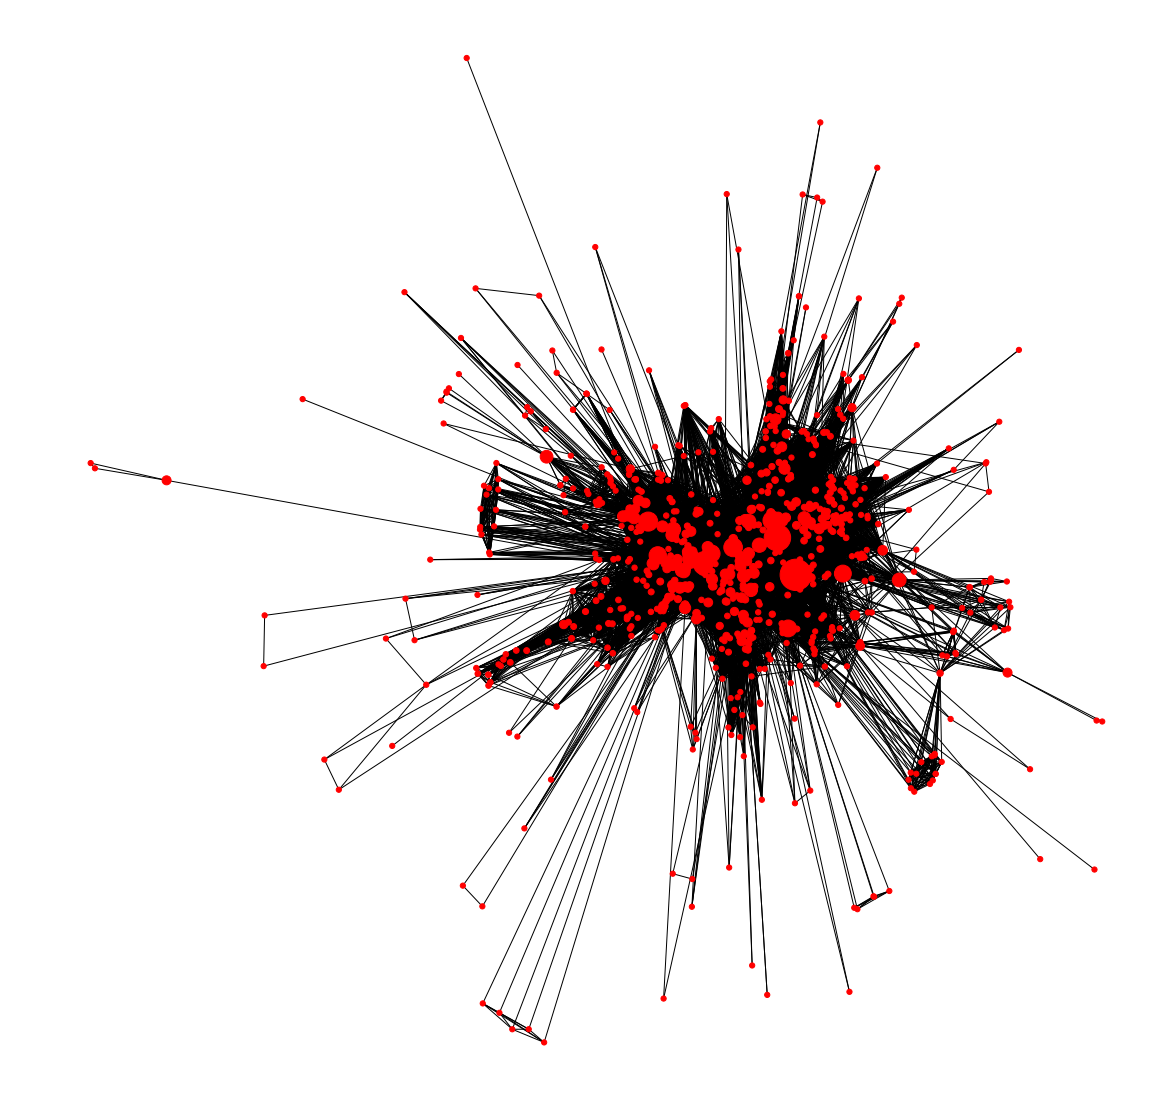

In [153]:
node_size =  [v * 10000 for v in betweennessCentrality.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_sub, pos=pos, with_labels=False,
                 node_size=node_size )
plt.axis('off')

In [138]:
eigen_centr = nx.eigenvector_centrality(G_sub)

### Adding Attributes

In [192]:
#G_sub.nodes

In [197]:
nx.set_node_attributes(G_sub, partition, "community")
G_sub.nodes['4594575']["community"]

0

In [194]:
nx.set_node_attributes(G_sub, deg_centrality, "degree")
G_sub.nodes['4594575']["degree"]

0.1587516960651289

In [184]:
nx.set_node_attributes(G_sub, close_centrality, "closeness")

In [195]:
G_sub.nodes['4594575']["closeness"]

0.5

In [185]:
nx.set_node_attributes(G_sub, bet_centrality, "betweenness")

In [196]:
G_sub.nodes['4594575']["betweenness"]

0.004126751925457062

### Installing Gephi and Visualising

In [199]:
pip install GraphiPy

    100% |████████████████████████████████| 204kB 6.4MB/s ta 0:00:01
    100% |████████████████████████████████| 102kB 7.7MB/s ta 0:00:01
    100% |████████████████████████████████| 102kB 9.7MB/s ta 0:00:01
    100% |████████████████████████████████| 7.1MB 2.3MB/s ta 0:00:011    12% |████                            | 901kB 7.9MB/s eta 0:00:01    83% |██████████████████████████▉     | 5.9MB 32.0MB/s eta 0:00:01
    100% |████████████████████████████████| 153kB 4.9MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 12.6MB/s ta 0:00:01
    100% |████████████████████████████████| 102kB 5.3MB/s a 0:00:011
    100% |████████████████████████████████| 71kB 27.6MB/s ta 0:00:01


    100% |████████████████████████████████| 204kB 10.0MB/s ta 0:00:01
  Stored in directory: /Users/naidamuslimova/Library/Caches/pip/wheels/d4/b4/c4/ab867cd0ac9e667f8cd269f9364fd1cb8ee75fe50f5ce97c79
Successfully built neotime
  Found existing installation: pyparsing 2.3.1
    Uninstalling pyparsing-2.3.1:
      Successfully uninstalled pyparsing-2.3.1
Note: you may need to restart the kernel to use updated packages.


In [202]:
pip install gephistreamer

    100% |████████████████████████████████| 61kB 2.8MB/s ta 0:00:011
  Stored in directory: /Users/naidamuslimova/Library/Caches/pip/wheels/39/32/71/756185558003ae3808d54da4420da4bd5668fb98a33981d4fa
  Stored in directory: /Users/naidamuslimova/Library/Caches/pip/wheels/a2/6e/4e/8b0ae12fb9b8a05715256952cf7609a8ab86285fab99b88c68
Successfully built gephistreamer ws4py
Note: you may need to restart the kernel to use updated packages.


In [203]:
from gephistreamer import graph
from gephistreamer import streamer

In [204]:
nx.write_gexf(G_sub, "test.gexf")

### Directed Graph

In [96]:
#g = {k: [v.strip() for v in vs] for k, vs in no_dup.items()}

#edges = [(a, b) for a, bs in no_dup.items() for b in bs]

df = pd.DataFrame(graph_edges_nested)

adj_matrix = pd.crosstab(df[0], df[1])

In [97]:
df.head()

,0,1
0,4594575,9649581
1,4594575,3313879
2,4594575,6138079
3,4594575,6524595
4,4594575,6670222


#### misc

In [18]:
dic={}
for i in uniq_nodes_2:
    for j in graph_data:
        if i in j:
            if i in dic:
                dic[i].extend(j)
            else:
                dic[i]=j           

KeyboardInterrupt: 

### Removing duplicates

In [ ]:
no_dup = {k: list(set(v)) for k, v in dic.items()}

In [ ]:
no_dup

### Building a Graph

In [ ]:
#G_2 = nx.Graph(dic)

In [ ]:
G = nx.Graph(no_dup)

In [ ]:
G.size()

In [ ]:
len(G.nodes())

In [ ]:
nx.draw_networkx(G)

In [ ]:
start_pos = nx.spring_layout(G, seed = 100)
nx.draw_networkx(G, pos=start_pos)

In [ ]:
for k, v in no_dup.items():
    G.add_edges_from(([(k, t) for t in v]))

In [ ]:
edge_list = G.edges()

In [ ]:
edge_list

In [ ]:
len(G.edges())

In [ ]:
#start_pos = nx.spring_layout(G, seed = 100)
nx.draw_networkx(G)

### Trying with an adjacency matrix

In [ ]:
g = {k: [v.strip() for v in vs] for k, vs in no_dup.items()}

edges = [(a, b) for a, bs in no_dup.items() for b in bs]

df = pd.DataFrame(edges)

adj_matrix = pd.crosstab(df[0], df[1])

In [ ]:
G_mat = nx.Graph(adj_matrix)
start_pos = nx.spring_layout(G_mat, seed = 100)
nx.draw_networkx(G_mat, pos=start_pos)

In [ ]:
for u, v, d in G_mat.edges(data=True):
    d['weight'] = 1
for u,v,d in G_mat.edges(data=True):
    print(u,v,d)

In [ ]:
for a,b,c in G.edges(data=True):
    c['weight'] = 1
for a,b,c in G.edges(data=True):
    print(a,b,c)

In [ ]:
vw_dist = dist[v] + edgedata.get(weight,1)

In [ ]:
#G = nx.DiGraph(adjacency_matrix)
#start_pos = nx.spring_layout(G_mat, seed = 100)
labels = nx.get_edge_attributes(G_mat,'weight')
nx.draw_networkx_edge_labels(G_mat,pos=start_pos,edge_labels=labels)
nx.draw_networkx(G_mat, pos=start_pos)

### Repeating same steps with smaller set 

In [ ]:
small_set = graph_data[:10]
len(small_set)

In [ ]:
small_set_uniq_nodes = {x for l in small_set for x in l}

In [ ]:
len(small_set_uniq_nodes)

In [ ]:
small_set_uniq_nodes = list(small_set_uniq_nodes)

In [ ]:
small_dict={}
for i in small_set_uniq_nodes:
    for j in small_set:
        if i in j:
            if i in small_dict:
                small_dict[i]+=j
            else:
                small_dict[i]=j           

In [ ]:
len(small_dict)

In [ ]:
#small_G = nx.Graph(small_dict)

In [ ]:
start_pos = nx.spring_layout(small_G, seed = 100)
nx.draw_networkx(small_G, pos=start_pos)

### Misc

In [ ]:
plt.figure(figsize=(18,18))
graph_pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, graph_pos, node_size=10, node_color='blue', alpha=0.3)
nx.draw_networkx_edges(G, graph_pos)
nx.draw_networkx_labels(G, graph_pos, font_size=8, font_family='sans-serif')

plt.show()

In [ ]:
#nx.draw(G)
#nx.draw_random(G)  
#nx.draw_spectral(G)  
#nx.draw_spring(G)